In [2]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os


In [3]:
base_dir=os.curdir + "\\images"

physical_devices = tf.config.list_physical_devices("GPU")
print(physical_devices)


[]


In [4]:
IMAGE_SIZE=256
BATCH_SIZE=64

#pre-processing
train_datagen = ImageDataGenerator( rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.1)

test_datagen = ImageDataGenerator(  rescale=1./255,
                                    validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,
                                                subset='training')

test_datagen = test_datagen.flow_from_directory(base_dir,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,
                                                subset='validation')


Found 6146 images belonging to 19 classes.
Found 674 images belonging to 19 classes.


In [5]:
cnn = Sequential()
cnn.add(layers.Conv2D(filters=32, padding='same', strides=2, kernel_size=3, activation='relu', input_shape=(256,256,3)))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(layers.Conv2D(filters=64, padding='same', strides=2, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(layers.Conv2D(filters=128, padding='same', strides=2, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(19, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [6]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:

hist = cnn.fit(train_datagen, epochs=25, verbose=1, validation_data=test_datagen)

Epoch 1/25
97/97 [==============================] - 63s 638ms/step - loss: 2.4021 - accuracy: 0.2623 - val_loss: 2.2151 - val_accuracy: 0.2685
Epoch 2/25
25/97 [======>.......................] - ETA: 43s - loss: 2.2011 - accuracy: 0.2692

KeyboardInterrupt: 

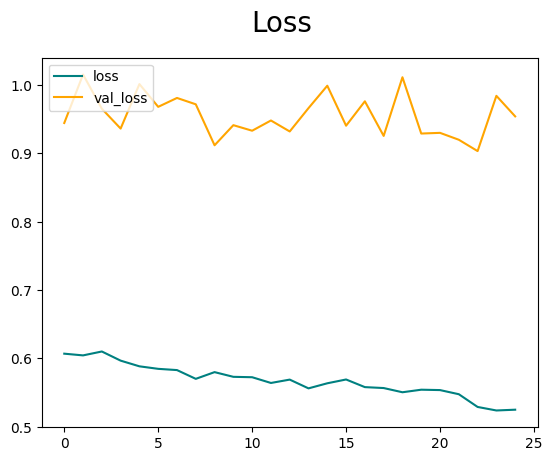

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()